In [24]:
import requests
import pandas as pd
import time


In [27]:
api_key = 'ngtUEJHSQAD1pUiPmmN0DlTRccsl1qPv' 
url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'

all_articles = []

start_date = '20130101' 
end_date = '20250420'  


In [28]:
import requests
import pandas as pd
import time

api_key = 'ngtUEJHSQAD1pUiPmmN0DlTRccsl1qPv'  

url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'

all_articles = []

def fetch_with_backoff(url, params):
    retries = 5  
    delay = 2  
    for i in range(retries):
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            return response.json()  # Return successful response
        elif response.status_code == 429:  # Rate limit exceeded
            print(f"Rate limit hit. Retrying in {delay} seconds...")
            time.sleep(delay)  # Wait before retrying
            delay *= 2  # Double the delay after each retry
        else:
            print(f"Failed with status code {response.status_code}")
            break
    return None  

def collect_nyt_articles_for_year(year):
    start_date = f'{year}0101' 
    end_date = f'{year}1231'
    
    params = {
        'q': 'S&P 500', 
        'api-key': api_key,  
        'begin_date': start_date,  
        'end_date': end_date, 
        'sort': 'newest',  
        'page': 0,  
        'fl': 'headline,snippet,web_url,pub_date'  
    }

    for page in range(0, 6): 
        params['page'] = page  
        
        response_data = fetch_with_backoff(url, params)
        
        if response_data:
            articles = response_data['response']['docs']  # Get articles from the response
            if articles:
                all_articles.extend(articles)  # Add the articles to the list
                print(f"Collected {len(articles)} articles from {year} - Page {page + 1}")
            else:
                print(f"No articles found for {year} on page {page + 1}")
        else:
            print(f"Failed to fetch articles for {year} on page {page + 1} after multiple retries.")
        
        time.sleep(10)  # Adjust the sleep time based on the API limits

for year in range(2013, 2026):
    collect_nyt_articles_for_year(year)

print(f"Total articles collected: {len(all_articles)}")

df_nyt = pd.DataFrame(all_articles)

df_nyt.to_csv('nyt_articles_s&p500_2013_to_2025.csv', index=False)

print(df_nyt.head())


Collected 10 articles from 2013 - Page 1
Collected 10 articles from 2013 - Page 2
Collected 10 articles from 2013 - Page 3
Collected 10 articles from 2013 - Page 4
Collected 10 articles from 2013 - Page 5
Collected 10 articles from 2013 - Page 6
Collected 10 articles from 2014 - Page 1
Collected 10 articles from 2014 - Page 2
Collected 10 articles from 2014 - Page 3
Collected 10 articles from 2014 - Page 4
Collected 10 articles from 2014 - Page 5
Collected 10 articles from 2014 - Page 6
Collected 10 articles from 2015 - Page 1
Collected 10 articles from 2015 - Page 2
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...
Collected 10 articles from 2015 - Page 3
Collected 10 articles from 2015 - Page 4
Collected 10 articles from 2015 - Page 5
Collected 10 articles from 2015 - Page 6
Collected 10 articles from 2016 - Page 1
Rate limit hit. Retrying in 2 seconds...
Rate limit hit. Retrying in 4 seconds...
Collected 10 articles from 2016 - Page 2
Collected 10 art

In [29]:
# Convert the list of articles to a DataFrame for easier manipulation
df_nyt = pd.DataFrame(all_articles)

# Save the DataFrame to a CSV file
df_nyt.to_csv('nyt_articles_s&p500_2013_to_2025.csv', index=False)

# Display the first few rows of the DataFrame
print(df_nyt.head())


                                            abstract  \
0  Markets on Wall Street were unchanged in light...   
1  Policy steps are needed to break the cycle in ...   
2  While the Standard & Poor’s 500-stock index, t...   
3  After asking what people were predicting, I wa...   
4  A look back at a year of change at Netflix and...   

                                    byline document_type  \
0  {'original': 'By The Associated Press'}       article   
1       {'original': 'By Jared Bernstein'}       article   
2  {'original': 'By The Associated Press'}       article   
3         {'original': 'By Paul Sullivan'}       article   
4      {'original': 'By James B. Stewart'}       article   

                                            headline  \
0  {'main': 'Markets Quiet as Investors Close Boo...   
1  {'main': 'Narrowing the Income Gap, Without An...   
2  {'main': 'Treasuries Grab the Spotlight on a Q...   
3  {'main': 'Forecasting the Year Ahead, and Prep...   
4  {'main': 'In 2013: 

In [30]:
import pandas as pd
news = pd.read_csv('nyt_articles_s&p500_2013_to_2025.csv')
news.head()

,abstract,byline,document_type,headline,_id,keywords,multimedia,news_desk,print_page,print_section,pub_date,section_name,snippet,source,subsection_name,type_of_material,uri,web_url,word_count
0,Markets on Wall Street were unchanged in light...,{'original': 'By The Associated Press'},article,{'main': 'Markets Quiet as Investors Close Boo...,nyt://article/8cd2d054-b353-5fdf-8aaf-77faf48a...,"[{'name': 'Subject', 'value': 'Stocks and Bond...","{'caption': '', 'credit': '', 'default': {'url...",Business,4.0,B,2013-12-30T15:33:18Z,Business,Markets on Wall Street were unchanged in light...,The New York Times,NaN,News,nyt://article/8cd2d054-b353-5fdf-8aaf-77faf48a...,https://www.nytimes.com/2013/12/31/business/da...,507
1,Policy steps are needed to break the cycle in ...,{'original': 'By Jared Bernstein'},article,"{'main': 'Narrowing the Income Gap, Without An...",nyt://article/1387fc68-d4da-5538-a106-28f55348...,"[{'name': 'Subject', 'value': 'Income Inequali...","{'caption': '', 'credit': '', 'default': {'url...",NaN,NaN,NaN,2013-12-30T15:14:45Z,Business,Policy steps are needed to break the cycle in ...,The New York Times,Economy,News,nyt://article/1387fc68-d4da-5538-a106-28f55348...,https://economix.blogs.nytimes.com/2013/12/30/...,1083
2,"While the Standard & Poor’s 500-stock index, t...",{'original': 'By The Associated Press'},article,{'main': 'Treasuries Grab the Spotlight on a Q...,nyt://article/ce77dc21-9c5f-521c-aea5-ff4058ed...,"[{'name': 'Subject', 'value': 'United States E...",{'caption': 'The New York Stock Exchange on Fr...,Business,3.0,B,2013-12-28T00:19:24Z,Business,"While the Standard & Poor’s 500-stock index, t...",The New York Times,NaN,News,nyt://article/ce77dc21-9c5f-521c-aea5-ff4058ed...,https://www.nytimes.com/2013/12/28/business/da...,415
3,"After asking what people were predicting, I wa...",{'original': 'By Paul Sullivan'},article,"{'main': 'Forecasting the Year Ahead, and Prep...",nyt://article/b323bdae-4118-56fe-9ce5-60d617ef...,"[{'name': 'Subject', 'value': 'United States E...","{'caption': 'Mike Ryan, a strategist at UBS We...",Business,5.0,B,2013-12-27T22:47:49Z,Your Money,"After asking what people were predicting, I wa...",The New York Times,NaN,News,nyt://article/b323bdae-4118-56fe-9ce5-60d617ef...,https://www.nytimes.com/2013/12/28/your-money/...,1500
4,A look back at a year of change at Netflix and...,{'original': 'By James B. Stewart'},article,"{'main': 'In 2013: Rebounds, Traders and Right...",nyt://article/fdfa23d8-4b90-53ef-92cb-2cab8b36...,"[{'name': 'Person', 'value': 'Stewart, James B...","{'caption': 'Reed Hastings, the chief executiv...",Business,1.0,B,2013-12-27T16:48:27Z,Business,A look back at a year of change at Netflix and...,The New York Times,NaN,News,nyt://article/fdfa23d8-4b90-53ef-92cb-2cab8b36...,https://www.nytimes.com/2013/12/28/business/a-...,1865


In [31]:
!pip install vaderSentiment==3.3.2


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [32]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis to the 'headline' and 'snippet' columns
def analyze_sentiment(text):
    if isinstance(text, str):  # Ensure that the input is a string
        sentiment = analyzer.polarity_scores(text)  # Get sentiment scores
        return sentiment['compound']  # Return the compound score (overall sentiment)
    return 0  # If it's not a valid string, return 0 as a neutral score

# Apply sentiment analysis to the 'headline' and 'snippet' columns
news['headline_sentiment'] = news['headline'].apply(analyze_sentiment)
news['snippet_sentiment'] = news['snippet'].apply(analyze_sentiment)

# Check the sentiment columns
print(news[['headline', 'headline_sentiment', 'snippet', 'snippet_sentiment']].head())


                                            headline  headline_sentiment  \
0  {'main': 'Markets Quiet as Investors Close Boo...              0.8126   
1  {'main': 'Narrowing the Income Gap, Without An...              0.0000   
2  {'main': 'Treasuries Grab the Spotlight on a Q...              0.4215   
3  {'main': 'Forecasting the Year Ahead, and Prep...             -0.7351   
4  {'main': 'In 2013: Rebounds, Traders and Right...              0.0000   

                                             snippet  snippet_sentiment  
0  Markets on Wall Street were unchanged in light...             0.0000  
1  Policy steps are needed to break the cycle in ...            -0.4215  
2  While the Standard & Poor’s 500-stock index, t...             0.2023  
3  After asking what people were predicting, I wa...            -0.3400  
4  A look back at a year of change at Netflix and...             0.4404  


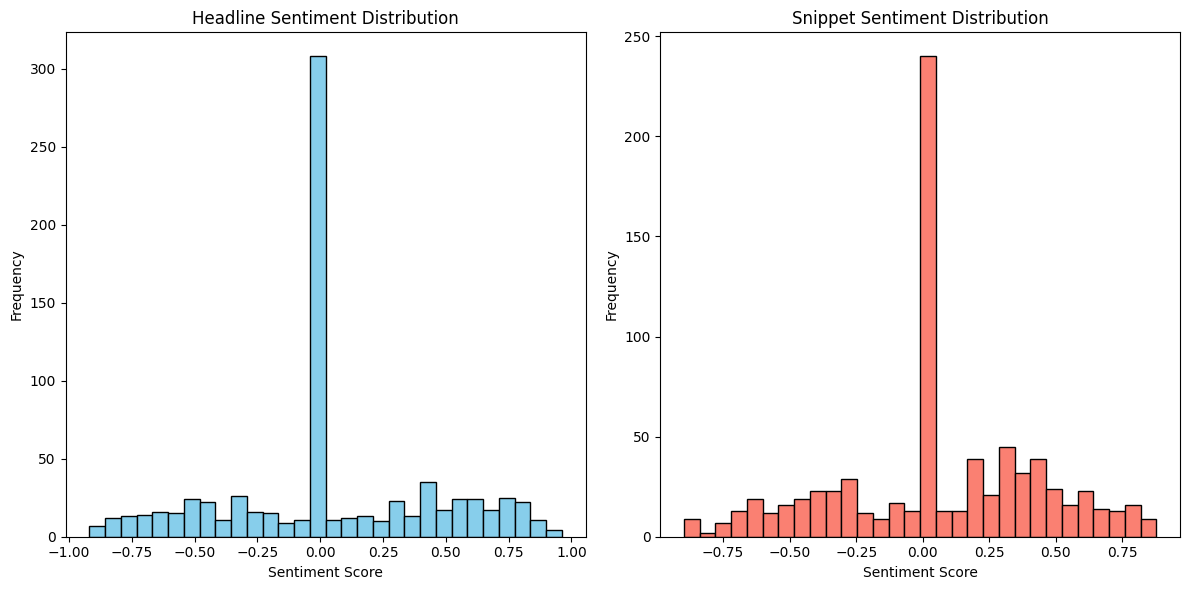

In [33]:
import matplotlib.pyplot as plt

# Visualize the distribution of sentiment scores
plt.figure(figsize=(12, 6))

# Plot histogram for headline sentiment
plt.subplot(1, 2, 1)
plt.hist(news['headline_sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Headline Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Plot histogram for snippet sentiment
plt.subplot(1, 2, 2)
plt.hist(news['snippet_sentiment'], bins=30, color='salmon', edgecolor='black')
plt.title('Snippet Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


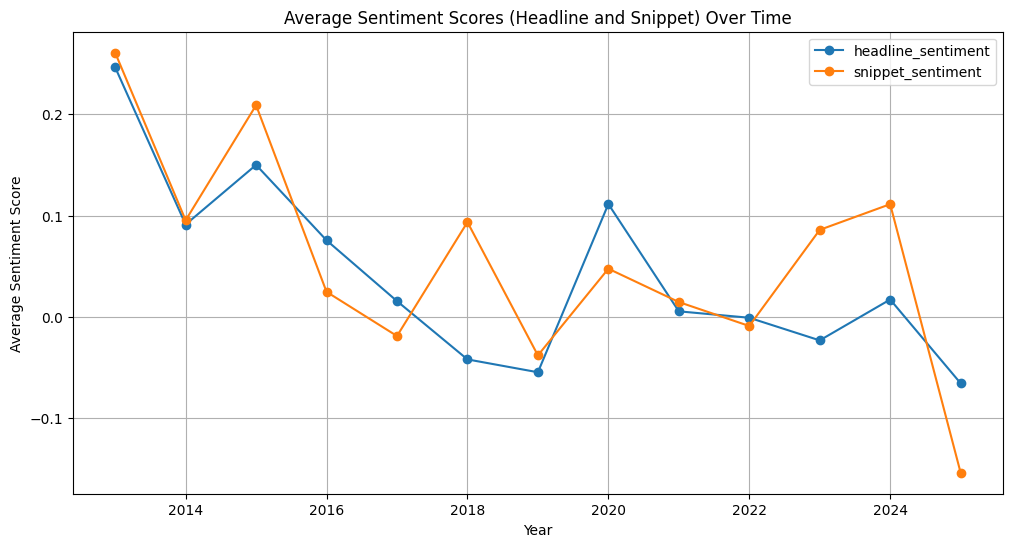

In [34]:
# Convert 'pub_date' to datetime format
news['pub_date'] = pd.to_datetime(news['pub_date'], errors='coerce')

# Filter out rows with invalid dates
news = news.dropna(subset=['pub_date'])

# Group by month or year to see sentiment trends over time
news['year'] = news['pub_date'].dt.year
sentiment_by_year = news.groupby('year')[['headline_sentiment', 'snippet_sentiment']].mean()

# Plot sentiment trends by year
sentiment_by_year.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Sentiment Scores (Headline and Snippet) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


In [35]:
news.head()

,abstract,byline,document_type,headline,_id,keywords,multimedia,news_desk,print_page,print_section,...,snippet,source,subsection_name,type_of_material,uri,web_url,word_count,headline_sentiment,snippet_sentiment,year
0,Markets on Wall Street were unchanged in light...,{'original': 'By The Associated Press'},article,{'main': 'Markets Quiet as Investors Close Boo...,nyt://article/8cd2d054-b353-5fdf-8aaf-77faf48a...,"[{'name': 'Subject', 'value': 'Stocks and Bond...","{'caption': '', 'credit': '', 'default': {'url...",Business,4.0,B,...,Markets on Wall Street were unchanged in light...,The New York Times,NaN,News,nyt://article/8cd2d054-b353-5fdf-8aaf-77faf48a...,https://www.nytimes.com/2013/12/31/business/da...,507,0.8126,0.0000,2013
1,Policy steps are needed to break the cycle in ...,{'original': 'By Jared Bernstein'},article,"{'main': 'Narrowing the Income Gap, Without An...",nyt://article/1387fc68-d4da-5538-a106-28f55348...,"[{'name': 'Subject', 'value': 'Income Inequali...","{'caption': '', 'credit': '', 'default': {'url...",NaN,NaN,NaN,...,Policy steps are needed to break the cycle in ...,The New York Times,Economy,News,nyt://article/1387fc68-d4da-5538-a106-28f55348...,https://economix.blogs.nytimes.com/2013/12/30/...,1083,0.0000,-0.4215,2013
2,"While the Standard & Poor’s 500-stock index, t...",{'original': 'By The Associated Press'},article,{'main': 'Treasuries Grab the Spotlight on a Q...,nyt://article/ce77dc21-9c5f-521c-aea5-ff4058ed...,"[{'name': 'Subject', 'value': 'United States E...",{'caption': 'The New York Stock Exchange on Fr...,Business,3.0,B,...,"While the Standard & Poor’s 500-stock index, t...",The New York Times,NaN,News,nyt://article/ce77dc21-9c5f-521c-aea5-ff4058ed...,https://www.nytimes.com/2013/12/28/business/da...,415,0.4215,0.2023,2013
3,"After asking what people were predicting, I wa...",{'original': 'By Paul Sullivan'},article,"{'main': 'Forecasting the Year Ahead, and Prep...",nyt://article/b323bdae-4118-56fe-9ce5-60d617ef...,"[{'name': 'Subject', 'value': 'United States E...","{'caption': 'Mike Ryan, a strategist at UBS We...",Business,5.0,B,...,"After asking what people were predicting, I wa...",The New York Times,NaN,News,nyt://article/b323bdae-4118-56fe-9ce5-60d617ef...,https://www.nytimes.com/2013/12/28/your-money/...,1500,-0.7351,-0.3400,2013
4,A look back at a year of change at Netflix and...,{'original': 'By James B. Stewart'},article,"{'main': 'In 2013: Rebounds, Traders and Right...",nyt://article/fdfa23d8-4b90-53ef-92cb-2cab8b36...,"[{'name': 'Person', 'value': 'Stewart, James B...","{'caption': 'Reed Hastings, the chief executiv...",Business,1.0,B,...,A look back at a year of change at Netflix and...,The New York Times,NaN,News,nyt://article/fdfa23d8-4b90-53ef-92cb-2cab8b36...,https://www.nytimes.com/2013/12/28/business/a-...,1865,0.0000,0.4404,2013


In [41]:
news.to_csv('news_data_with_sentiment.csv', index=False)